# BICS_ABM
Ethan Roubenoff

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BICS_ABM import BICS_ABM, VaccineRule
import time
from joblib import Parallel, delayed, Memory

/Users/eroubenoff/BICS_ABM/BICS_ABM.py:78: DtypeWarning: Columns (26,63,64,65,66,68,69,70,71,72,73,76,86,139,140,149,175,176,177,191,195,205,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,229) have mixed types. Specify dtype option on import or set low_memory=False.
  BICS = pd.read_csv("data/df_all_waves.csv")


## Quick, demonstrative example:

In [ ]:
result = BICS_ABM( 
        N_HH = 10000,
        SEED = 4949, 
        RHO = 0.9,
        ALPHA = 0.25,
        BETA = 0.01,
        T0 = 60,
        ISOLATION_MULTIPLIER = 0.1, 
        N_VAX_DAILY = 1500,
        vax_rules = [
            VaccineRule("age > 80"),
            VaccineRule("age > 70"),
            VaccineRule("age > 60"),
            VaccineRule("age > 50", hesitancy = 0.5),
            VaccineRule("age > 40", hesitancy = 0.5),
            VaccineRule("age > 30", hesitancy = 0.5),
            VaccineRule(general = True, hesitancy = 0.5),
        ])

result.plot_trajectory()

## Another demonstrative example

Vary beta (probability of transmission from 0 to 0.1 in increments of 0.001. Run 10 simulations of each value for  beta. Plot the number of deaths against beta.

In [ ]:
beta_vec = np.arange(0, 0.1, 0.001)
beta_vec = beta_vec.repeat(10)
result_vec= np.zeros(beta_vec.shape) 

t = time.time()
for i, v in enumerate(beta_vec):
    print(i, "of", len(beta_vec), "sims", end = "\r")
    time.sleep(0) # To make carraige return work
    result = BICS_ABM(BETA = v, N_HH = 100, silent = True)
    result_vec[i] = result.D[-1] / (result.S[0] + result.E[0])
    
t = time.time() - t

print(len(beta_vec), "iterations took", t, "seconds")

In [ ]:
plt.scatter(beta_vec, result_vec*100)


# Main analysis

Run simulations that gradually decrease number of nonhousehold contacts required for priority access. Start at 30
and work down. Begin by assuming no asymptomatic transmission and 70% symptomatic rate, no isolation.


Run 10 simulations for each, and chart the number of deaths.

In [3]:
# Define a location to store cache
location = './cache'
memory = Memory(location, verbose=0)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
Day   2[Parallel(n_jobs=10)]: Done   1 tasks      | elapsed:   14.4s  2461 | D:   113 | V1:    52 | V2:    50 | VW:     0 | VBoost:     0 | Edge counts: Household:  1726 Work  Random   3863S:   627 | E:    40 | Ic:   367 | Isc:     0 | R:  2509 | D:   120 | V1:    39 | V2:    50 | VW:     0 | VBoost:     0 | Edge counts: Household:  1731 Work  Random   3909 V1:   111 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:  1700 Work  Random   3656
Day   12 Hour  9 | S:   741 | E:    37 | Ic:   204 | Isc:     0 | R:  2480 | D:   113 | V1:    52 | V2:    50 | VW:     0 | VBoost:     0 | Edge counts: Household:  17[Parallel(n_jobs=10)]: Done   2 tasks      | elapsed:   14.5s    0 | R:    19 | D:     0 | V1:   111 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:  1714 Work  Random   3686
Day   11 Hour  1 | S:   740 | E:    24 | Ic:   179 | Isc:     0 | R:  2518 | D:   114 |[Parallel

Day   31 Hour 13 | S:   727 | E:     4 | Ic:    30 | Isc:     0 | R:  2692 | D:   122 | V1:     0 | V2: [Parallel(n_jobs=10)]: Done  36 tasks      | elapsed:   16.5s1699 Work  Random   3896
[Parallel(n_jobs=10)]: Done  37 tasks      | elapsed:   16.5s
[Parallel(n_jobs=10)]: Done  38 tasks      | elapsed:   16.5s
Day S: S: 31 Hour 14 | 719S:     864 | E: 605 |   E:  |     4 | Ic: 46E:  | Isc:   1430  376 | R:  | 2872 | Ic: D:   | Ic: 1401889  136 | V1:  |  | Isc:     00 |  | R: V2:  1779   89 |  | VW: D:     0   65 | V1: Isc:     0 | R:   909 | D:    34 | V1:   111 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:  1723 Work  Random   [Parallel(n_jobs=10)]: Done  39 tasks      | elapsed:   16.7s
Day Ic: 31S:   865 | Isc:     0 | R:  1807 | D:    68 | V1:   111 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:  165[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:   16.8s9S:  | E: 727 | 371E:  |     4 | Ic: Ic:    28 | Isc:     0 | R:  2693 | D:   123 |

Day   11 Hour 16 | S:  1886 | E:  1061 | Ic:   754 |

Day   12 Hour 16 | S:  1852 | E:  1054 | Ic:   790 | Isc:     0 | R:    43 | D:     0 | V1:   104 | V2[Parallel(n_jobs=10)]: Done  96 tasks      | elapsed:   18.4s


Day   14 Hou

Day   14 Hour 22 | S:  1038 | E:   571 | Ic:  1556 | Is

Day   15 Hour  7 | S:  1140 | E:   618 | Ic:

S: S:  1115  917 | E:   Day S: 17 Hour 1075 | E: 10 |  | E: 644 | 361 | Ic:  1444 | Isc:     0 | R: 576 | 924 | Ic:  1500 | Isc: Ic: 0 | 1604 | Isc:     0 | R:   395 | D:    21 | V1:   104 | V2: D:     0 | VW: 34 | V1:   101 | V2: R:     0 | 0 | VBoost: VW:     0 | 484 | D: 0 | Edge counts: Household: VBoost:  

Day   16 Hour  8 | S:   727 | E:   260 | Ic:  1171 | Isc:     0 | R:  1524 | D:    47 | V1:   

Day   16 Hour 14 | S:   846 | E:   261 | Ic:  1214 | I

Day   19 Hour 12 

Day   19 Hour  0 | S: S:   651 |   E:   123 | Ic:   706 | 859 | E:   245 | Ic:  1200Isc:  | Isc:     0     | R: 0 | 2170R:  | D:  1333 | D: 79 | 51 | V1: V1:    87 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:  18

Isc: Day     0   R: 19 Hour S:    14806 |   | 1532 | D:  | R: 60 2304 | D: E:    83 | 254 | Ic: V1: 1247 | 87 | V2:  |     0V1:    96 | V2:     0 | VW:     0 | VBoost:     0 | Edge counts: Household:  |  1914 Work VW: 

Day   22 Hour  3 | S:   762 | E:    94 | Ic:   677 | Isc:     0 | R:  2050 | D:    97 | V1:   101 | V2:     0 

Day   24 Hour 10 | S:   730 | E:    43 | Ic:   316 | Isc:     0 | R:  2470 | D:   121 | V1:   101 | V2:     0 |

Day   28 Hour 17 | S:   700 | E:    16 | Ic:    44 | Isc:     0 | R:  2789 | D:   131 | V1:     0 | V2

Day   32 Hour 11 | S:   575 | E:     2 | Ic:    13 | Isc:     0 | R:  3028 | D:   111 | V1:     0 | V2:    87 | VW:     0 | VBoost:     0 | Edge counts: Household:  6310 Work  Random      0

Day   36 Hour 20 | S:   659 | E:     0 | Ic:    19 | Isc:     0 | R:  2904 | D:   157 | V1:     0 |

Day   38 Hour 15 | S:   728 | E:     0 | Ic:     0 | Isc:     0 | R:  2833 | D:   127 | V1:     0 | V2:    96 | VW:     0 | VBoost:     0 | Edge counts: Household:  6177 Work  Random      0

Day   37 Hour 23 | S:   728 | E:     0 | Ic:     0 | Isc:     0 | R:  2833 | D:   127 | V1:     0 | V2:    96 | VW:     0 | VBoost:     0 | Edge counts: Household:  6177 Work  Random      0S:   728 | E:     0 | Ic:     0 | Isc:     0 | R:  2833 | D:   127 | V1:     0 | V2:    96 | VW:     0 | VBoost:     0 | Edge counts: Household:  6177 Work  Random      0
[Parallel(n_jobs=10)]: Done  97 tasks      | elapsed:   23.2s
[Parallel(n_jobs=10)]: Done  98 tasks      | elapsed:   23.3s
[Parallel(n_jobs=10)]: Done  99 tasks      | elapsed:   23.6s
[Parallel(n_jobs=10)]: Done 100 tasks      | elapsed:   23.6s
[Parallel(n_jobs=10)]: Done 101 tasks      | elapsed:   27.5s
[Parallel(n_jobs=10)]: Done 102 tasks      | elapsed:   27.5s
[Parallel(n_jobs=10)]: Done 103 tasks      | elapsed:   27.5s
[Parallel(n_jobs=10)]: Done 104 tasks      | elapsed:   27.5s
[Parallel(n_jobs=10)]: Done 105 tasks      | elapsed:   27.5s
[Parallel(n_jobs=10)]: Done 106 tasks      | elapsed:   27.5s
[Parallel(n_jobs=10)

[Parallel(n_jobs=10)]: Done 281 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 282 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 283 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 284 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 285 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 286 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 287 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 288 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 289 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 290 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 291 tasks      | elapsed:   46.7s
[Parallel(n_jobs=10)]: Done 292 tasks      | elapsed:   47.4s
[Parallel(n_jobs=10)]: Done 293 tasks      | elapsed:   47.5s
[Parallel(n_jobs=10)]: Done 294 tasks      | elapsed:   48.5s
[Parallel(n_jobs=10)]: Done 295 tasks      | elapsed:   50.7s
[Parallel(n_jobs=10)]: Done 296 tasks      | elapsed:   52.4s
[Paralle

[Parallel(n_jobs=10)]: Done 465 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 466 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 467 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 468 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 469 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 470 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 471 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 472 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 473 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 474 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 475 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 476 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 477 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 478 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 479 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 480 tasks      | elapsed:  1.3min
[Paralle

[Parallel(n_jobs=10)]: Done 598 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 599 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 600 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 601 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 602 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 603 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 604 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 605 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 606 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 607 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 608 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 609 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 610 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 611 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 612 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 613 tasks      | elapsed:  1.9min
[Paralle

[Parallel(n_jobs=10)]: Done 739 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 740 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 741 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 742 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 743 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 744 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 745 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 746 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 747 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 748 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 749 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 750 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 751 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 752 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 753 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 754 tasks      | elapsed:  2.2min
[Paralle

[Parallel(n_jobs=10)]: Done 893 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 894 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 895 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 896 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 897 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 898 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 899 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 900 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 901 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 902 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 903 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 904 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 905 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 906 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 907 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 908 tasks      | elapsed:  2.8min
[Paralle

[Parallel(n_jobs=10)]: Done 1066 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1067 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1068 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1069 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1070 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1071 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1072 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1073 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1074 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1075 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1076 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1077 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1078 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1079 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1080 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 1081 tasks      | elapsed: 

[Parallel(n_jobs=10)]: Done 1197 tasks      | elapsed:  3.6min
[Parallel(n_jobs=10)]: Done 1198 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 1199 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 1200 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 1201 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1202 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1203 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1204 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1205 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1206 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1207 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1208 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1209 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1210 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1211 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 1212 tasks      | elapsed: 

[Parallel(n_jobs=10)]: Done 1334 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1335 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1336 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1337 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1338 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1339 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1340 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1341 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1342 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1343 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1344 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1345 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1346 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1347 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1348 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 1349 tasks      | elapsed: 

[Parallel(n_jobs=10)]: Done 1493 tasks      | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done 1494 tasks      | elapsed:  4.4min
[Parallel(n_jobs=10)]: Done 1495 tasks      | elapsed:  4.4min
[Parallel(n_jobs=10)]: Done 1496 tasks      | elapsed:  4.4min
[Parallel(n_jobs=10)]: Done 1497 tasks      | elapsed:  4.5min
[Parallel(n_jobs=10)]: Done 1498 tasks      | elapsed:  4.5min
[Parallel(n_jobs=10)]: Done 1499 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 1500 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 1501 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 1502 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 1503 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 1504 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 1505 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 1506 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 1507 tasks      | elapsed:  4.6min
[Parallel(n_jobs=10)]: Done 1508 tasks      | elapsed: 

[Parallel(n_jobs=10)]: Done 1657 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1658 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1659 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1660 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1661 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1662 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1663 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1664 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1665 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1666 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1667 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1668 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1669 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1670 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1671 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 1672 tasks      | elapsed: 

[Parallel(n_jobs=10)]: Done 1793 tasks      | elapsed:  5.3min
[Parallel(n_jobs=10)]: Done 1794 tasks      | elapsed:  5.3min
[Parallel(n_jobs=10)]: Done 1795 tasks      | elapsed:  5.3min
[Parallel(n_jobs=10)]: Done 1796 tasks      | elapsed:  5.4min
[Parallel(n_jobs=10)]: Done 1797 tasks      | elapsed:  5.4min
[Parallel(n_jobs=10)]: Done 1798 tasks      | elapsed:  5.4min
[Parallel(n_jobs=10)]: Done 1799 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done 1800 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done 1801 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done 1802 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done 1803 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done 1804 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done 1805 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done 1806 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done 1807 tasks      | elapsed:  5.5min
[Parallel(n_jobs=10)]: Done 1808 tasks      | elapsed: 

[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1966 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1967 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1968 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1969 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1970 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1971 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1972 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1973 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1974 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1975 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1976 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1977 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1978 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1979 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 1980 tasks      | elapsed: 

[Parallel(n_jobs=10)]: Done 2096 tasks      | elapsed:  6.3min
[Parallel(n_jobs=10)]: Done 2097 tasks      | elapsed:  6.3min
[Parallel(n_jobs=10)]: Done 2098 tasks      | elapsed:  6.4min
[Parallel(n_jobs=10)]: Done 2099 tasks      | elapsed:  6.4min
[Parallel(n_jobs=10)]: Done 2100 tasks      | elapsed:  6.4min
[Parallel(n_jobs=10)]: Done 2101 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2102 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2103 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2104 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2105 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2106 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2107 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2108 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2109 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2110 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2111 tasks      | elapsed: 

[Parallel(n_jobs=10)]: Done 2293 tasks      | elapsed:  6.8min
[Parallel(n_jobs=10)]: Done 2294 tasks      | elapsed:  6.9min
[Parallel(n_jobs=10)]: Done 2295 tasks      | elapsed:  6.9min
[Parallel(n_jobs=10)]: Done 2296 tasks      | elapsed:  6.9min
[Parallel(n_jobs=10)]: Done 2297 tasks      | elapsed:  7.0min
[Parallel(n_jobs=10)]: Done 2298 tasks      | elapsed:  7.0min
[Parallel(n_jobs=10)]: Done 2299 tasks      | elapsed:  7.0min
[Parallel(n_jobs=10)]: Done 2300 tasks      | elapsed:  7.0min
[Parallel(n_jobs=10)]: Done 2301 tasks      | elapsed:  7.1min
[Parallel(n_jobs=10)]: Done 2302 tasks      | elapsed:  7.1min
[Parallel(n_jobs=10)]: Done 2303 tasks      | elapsed:  7.1min
[Parallel(n_jobs=10)]: Done 2304 tasks      | elapsed:  7.1min
[Parallel(n_jobs=10)]: Done 2305 tasks      | elapsed:  7.1min
[Parallel(n_jobs=10)]: Done 2306 tasks      | elapsed:  7.1min
[Parallel(n_jobs=10)]: Done 2307 tasks      | elapsed:  7.1min
[Parallel(n_jobs=10)]: Done 2308 tasks      | elapsed: 

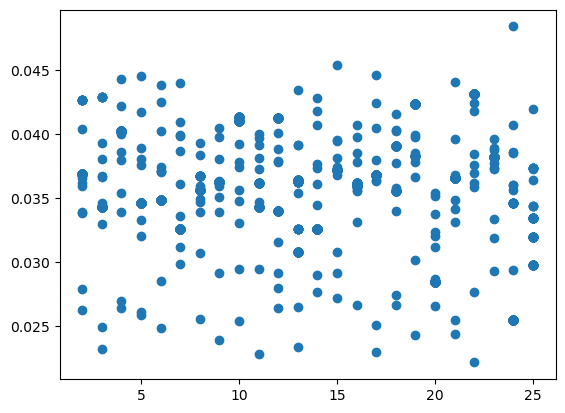

In [4]:
cc_min = np.arange(25, 1, -1)
cc_min = cc_min.repeat(100)

t = time.time()


def multi_fn(i):
    """ Wrapper function for multiprocessing
    
    """
    
    result = BICS_ABM(
        # 1000 HHs, approx 3000 people, and 10% chance of transmission
        N_HH = 1000, BETA = 0.01,
        # No presymptomatic transmission, all cases are symptomatic
        ALPHA = 0, RHO = 1, 
        # No isolation
        ISOLATION_MULTIPLIER = 1,
        silent = True , 
        vax_rules = [
            VaccineRule("num_cc_nonhh > " + str(i)) 
        ]
    )
    
    return result.D[-1] / (result.S[0] + result.E[0])
    
    
multi_fn = memory.cache(multi_fn)
# 10 is about the efficiency limit-- 2400 cycles will take about 7 mins
result_vec = Parallel(n_jobs=10, verbose = 50, prefer="threads")(delayed(multi_fn)(v) for v in cc_min)
    
    
t = time.time() - t

print(len(cc_min), "iterations took", t, "seconds")

plt.scatter(cc_min, result_vec)

In [5]:
import gc; gc.collect()

53

In [ ]:
result.plot_trajectory()